In [1]:
import pandas as pd
import bz2
from sklearn.metrics import f1_score,classification_report
from sklearn.neural_network import MLPClassifier



In [2]:
from data_getter import *

30220 summaries containing 'No summary available'
6142 summaries containing 'Full story available on'
Duplicate summaries removed: 14242
Duplicate headlines removed: 404
randomizing order of data


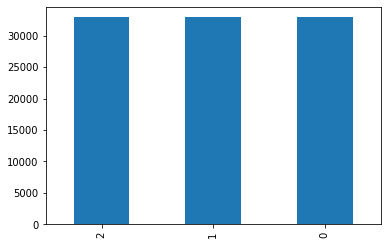

In [3]:
balanced_dataset['priceChangeClass'].value_counts().plot(kind='bar');

## Naive Bayes classifier¶

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
steps= [('vec', CountVectorizer()), ('multinomialnb', MultinomialNB())]
pipeline = Pipeline(steps)
pipeline.fit(train_data.summary, train_data.priceChangeClass)

Pipeline(steps=[('vec', CountVectorizer()), ('multinomialnb', MultinomialNB())])

In [6]:
pipeline.score(test_data.summary, test_data.priceChangeClass)

0.43465045592705165

In [7]:
steps= [('vec', TfidfVectorizer()), ('multinomialnb', MultinomialNB())]
pipeline2 = Pipeline(steps)
pipeline2.fit(train_data.summary, train_data.priceChangeClass)

Pipeline(steps=[('vec', TfidfVectorizer()), ('multinomialnb', MultinomialNB())])

In [8]:
pipeline2.score(test_data.summary, test_data.priceChangeClass)

0.4371833839918946

              precision    recall  f1-score   support

           0       0.42      0.43      0.42      5914
           1       0.46      0.49      0.48      5917
           2       0.42      0.39      0.40      5935

    accuracy                           0.43     17766
   macro avg       0.43      0.43      0.43     17766
weighted avg       0.43      0.43      0.43     17766



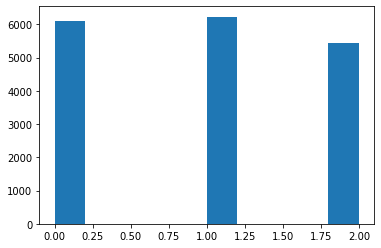

In [23]:
from sklearn.metrics import f1_score,classification_report


predicted = pipeline.predict(test_data.summary)
plt.hist(predicted)

print(classification_report(test_data.priceChangeClass, predicted))


In [16]:
from data_analyser import calc_rate_of_return

In [17]:
rate_return = calc_rate_of_return(predicted, test_data["1stepChange"].tolist(), buy_class=2)

In [18]:
np.mean(rate_return)

1.0034550017223098

In [19]:
np.mean(test_data["1stepChange"].tolist())

1.0001833401770026

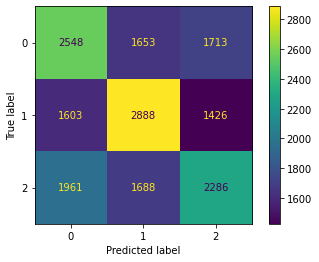

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(pipeline, test_data.summary, test_data.priceChangeClass)


## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [21]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_data.summary, train_data.priceChangeClass)
dummy_clf.score(test_data.summary, test_data.priceChangeClass)

0.33113812901046946

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [22]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_data.summary, train_data.priceChangeClass)
dummy_clf.score(test_data.summary, test_data.priceChangeClass)



0.33305189688168413

## Problem 4: Creating a balanced data set

## Problem 5: Confusion matrix

In [19]:
from sklearn.model_selection import GridSearchCV

steps= [('vec', CountVectorizer()), ('multinomialnb', MultinomialNB())]
new_pipeline = Pipeline(steps)
#a = GridSearchCV(estimator=new_pipeline, param_grid={"vec__binary": [True, False],"vec__ngram_range":[(1,1), (1,2)], 
#                                                     "multinomialnb__alpha":[1,0.1]})
new_pipeline.fit(train_data.summary, train_data.priceChangeClass)


Pipeline(steps=[('vec', CountVectorizer()), ('multinomialnb', MultinomialNB())])

In [20]:
#print(a.best_params_)
new_pipeline.score(test_data.summary,test_data.priceChangeClass)

0.5202861522738886

## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;6? Answer with a short text.

In [ ]:
from sklearn.svm import SVC

steps = [('vec', CountVectorizer()), ('svc',  SVC())]

#parameters = {'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

pipeline = Pipeline(steps)

#clf = GridSearchCV(pipeline, parameters)
pipeline.fit(train_data.summary, train_data.priceChangeClass)


In [ ]:
#print(pipeline.best_params_)
pipeline.score(test_data.summary,test_data.priceChangeClass)

In [28]:
from sklearn.neural_network import MLPClassifier

steps = [('vec', TfidfVectorizer()), ('net',  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=2000))]
pipeline = Pipeline(steps)
pipeline.fit(train_data.summary, train_data.priceChangeClass)


Pipeline(steps=[('vec', TfidfVectorizer()),
                ('net',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 10),
                               max_iter=2000, random_state=1,
                               solver='lbfgs'))])

In [29]:
pipeline.score(test_data.summary,test_data.priceChangeClass)

0.33305189688168413

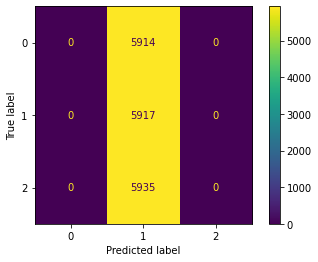

In [30]:
plot_confusion_matrix(pipeline, test_data.summary, test_data.priceChangeClass)

In [27]:
from sklearn.metrics import f1_score,classification_report

res = pipeline.predict(test_data.summary)

print(classification_report(test_data.priceChangeClass, res))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5914
           1       0.33      1.00      0.50      5917
           2       0.00      0.00      0.00      5935

    accuracy                           0.33     17766
   macro avg       0.11      0.33      0.17     17766
weighted avg       0.11      0.33      0.17     17766



/home/hugo/.virtualenvs/stock-news/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## With countvectorizer

In [31]:

steps = [('vec', CountVectorizer()), ('net',  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,10,10,10,10), random_state=1,max_iter=3000))]
pipeline = Pipeline(steps)
pipeline.fit(train_data.summary, train_data.priceChangeClass)

/home/hugo/.virtualenvs/stock-news/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('vec', CountVectorizer()),
                ('net',
                 MLPClassifier(alpha=1e-05,
                               hidden_layer_sizes=(15, 10, 10, 10, 10),
                               max_iter=3000, random_state=1,
                               solver='lbfgs'))])

In [32]:
pipeline.score(test_data.summary,test_data.priceChangeClass)

0.40994033547225034

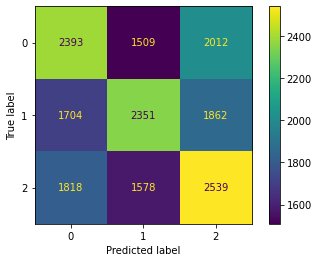

In [35]:


plot_confusion_matrix(pipeline, test_data.summary, test_data.priceChangeClass)

In [36]:
res = pipeline.predict(test_data.summary)

print(classification_report(test_data.priceChangeClass, res))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40      5914
           1       0.43      0.40      0.41      5917
           2       0.40      0.43      0.41      5935

    accuracy                           0.41     17766
   macro avg       0.41      0.41      0.41     17766
weighted avg       0.41      0.41      0.41     17766



In [42]:
text = test_data.iloc[20:50]
res = pipeline.predict(text.summary)
print(res)
print(text.priceChangeClass.to_numpy())

[1 0 2 2 1 0 0 0 1 1 1 1 2 0 0 0 0 2 0 1 1 1 2 1 2 0 2 1 0 0]
[1 0 2 2 0 0 0 0 1 1 1 1 2 0 0 2 1 0 0 1 1 1 2 2 2 1 2 1 2 0]


In [43]:
test_data

,datetime,headline,summary,related,lang,source,1stepChange,2stepChange,3stepChange,priceChangeClass,6stepChange
0,2020-09-22 01:00:16-05:00,"Snap has registered 750,000 people to vote in ...","Teaming up with artist Mark Bradford, Snapchat...",SNAP,en,Fast Company,1.000418,1.003763,1.002508,1,1.001254
1,2020-01-30 09:21:21-05:00,Agnico Eagle Mines Limited : Towards the break...,Agnico Eagle Mines Limited shares are closing ...,AEM,en,MarketScreener,0.996059,1.002982,1.003284,1,1.022250
2,2019-11-06 00:12:59-05:00,Outgoing NYPD Commissioner James O’Neill to jo...,Police Commissioner James O’Neill will head Vi...,V,en,New York Post,1.002438,1.000454,1.002438,1,1.003459
3,2020-02-07 13:42:12-05:00,Crypto Today: Ethereum rockets higher with fur...,Here's what you need to know on Friday Markets...,ETH,en,Forex Crunch,0.993416,0.996842,0.998212,0,0.993416
4,2019-07-23 08:12:21-05:00,"What You Need To Know About TurnKey, Amazon's ...",Real estate services company Realogy Holdings ...,RLGY,en,Benzinga,0.961252,0.941878,0.959762,0,0.858420
...,...,...,...,...,...,...,...,...,...,...,...
39135,2020-05-07 06:53:49-05:00,Indian education platform Unacademy’s database...,"Unacademy, one of India’s largest learning sit...",INFY,en,The Next Web,1.010193,1.015855,1.019819,2,1.018686
39136,2020-03-31 08:30:02-05:00,"Snapchat launches App Stories, which lets deve...",Josh Constine / TechCrunch : Snapchat launches...,SNAP,en,Techmeme,1.004292,0.990558,1.040343,1,1.054506
39137,2019-02-06 09:50:26-05:00,Can A High-Yield Allocation Still Offset Equit...,No summary available.,"JSD,JQC",en,Seeking Alpha,1.000000,1.000425,1.001610,1,1.000644
39138,2019-04-15 17:12:00-05:00,"PG&E Shares, Bonds Surge on Governor’s Wildfir...",PG&E Corp.’s stock and bond prices have surged...,PCG,en,The Wall Street Journal,1.000424,0.995335,0.993215,1,1.019932
